In [1]:
import numpy as np
from synthetic_network import grow_network

# Dimensions of virtual plate
xmin = -5
xmax = 5
ymin = 0
ymax = 10


# Network occupancy grids
g_res = 5  # grid resolution per unit distance
g_rows = (ymax - ymin) * g_res  # number of grid rows
g_cols = (xmax - xmin) * g_res  # number of grid columns
fungus_grid = np.zeros([g_rows, g_cols], dtype=np.int32)  # fungus occupancy grid
obstacle_grid = np.zeros([g_rows, g_cols], dtype=np.int32)  # obstacle occupancy grid
grids = {"fungus": fungus_grid, "obstacle": obstacle_grid}

(network, tip_nodes) = grow_network(75, grids)

Mycorrhizal Network Simulation
Murray Shanahan               
May 2024                      



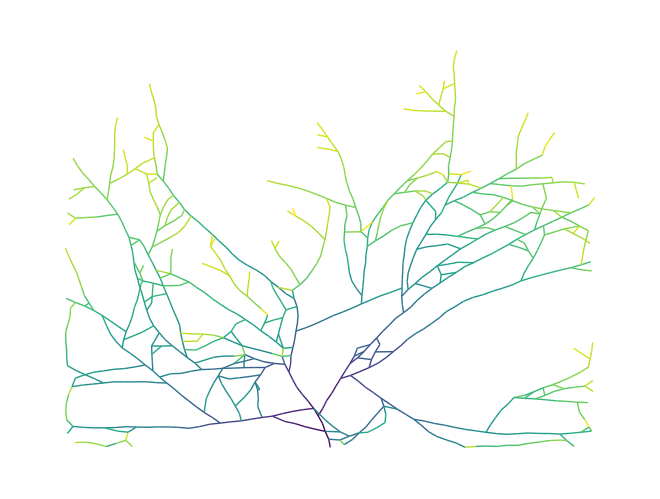

In [2]:
import networkx as nx

g = nx.from_numpy_array(network['conn'])
edges = g.edges()
colors = [g[u][v]['weight'] for u,v in edges]
nx.draw(g, {n: pos for n, pos in enumerate(network['coords'])}, edgelist=edges, edge_color=colors, nodelist=[])

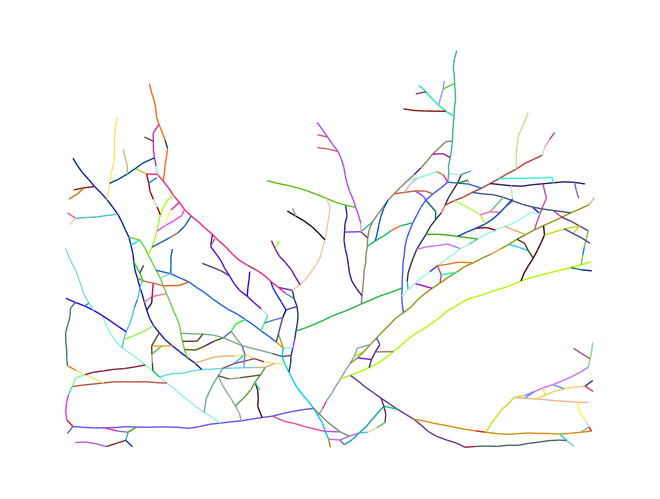

In [3]:
import networkx as nx

g2 = nx.from_numpy_array(network['conn_hyperedge'])
edges = g2.edges()
hyperedges = [g2[u][v]['weight'] for u,v in edges]
def random_color():
    return [np.random.randint(0,256) for _ in range(3)]
colors_dict = {h: random_color() for h in hyperedges}
colors = [colors_dict[hyperedge] for hyperedge in hyperedges]
nx.draw(g2, {n: pos for n, pos in enumerate(network['coords'])}, edgelist=edges, edge_color=colors, nodelist=[])